In [10]:
print("Hello, EITN!")

Hello, EITN!


In [11]:
a = 2 + 2
print(a)

4


In [12]:
print(a)

4


In [13]:
a_tuple = (2, "da")

In [14]:
print(a_tuple)

(2, 'da')


In [17]:
a_tuple[1] = 'bartosz'

TypeError: 'tuple' object does not support item assignment

In [18]:
a_tuple = "string"

In [19]:
print(a_tuple)

string


In [20]:
a_list = [2, 'bartosz']

In [24]:
a_list[0] = 5
print(a_list)
a_list.append('me')
print(a_list)

[5, 'bartosz']
[5, 'bartosz', 'me']


In [31]:
for i in range(1, 5, 2):
    print(i)
    print('hello')

1
hello
3
hello


**Exercise** Create a tuple and a list containing your first name and your last names

In [33]:
atuple = ('Bartosz', "Telenczuk")

In [34]:
alist = ['Bartosz', 'Telenczuk']

In [38]:
first, second = alist

In [39]:
second

'Telenczuk'

In [48]:
for i in range(2):
    alist[i] = alist[i] * 2
print(alist)

['BartoszBartoszBartoszBartosz', 'TelenczukTelenczukTelenczukTelenczuk']


# NumPy

In [42]:
import numpy as np

In [43]:
new_array = np.arrayn([1, 2, 3, 4])

In [44]:
print(new_array)

[1 2 3 4]


In [45]:
new_array * 2

array([2, 4, 6, 8])

In [46]:
np.exp(new_array)

array([  2.71828183,   7.3890561 ,  20.08553692,  54.59815003])

In [50]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

In [51]:
np.ones(5)

array([ 1.,  1.,  1.,  1.,  1.])

**Exercise** Create the following array and store in the a new variable called `arr`:
`[0,5,8,10]`

$E=mc^2$

# Loading data

In [52]:
!head lfp.txt

2.799,-2.622,3.282,5.347,14.977,-4.088,14.369,12.822,17.566,8.630
3.490,2.981,6.343,16.577,22.077,-7.614,33.572,31.573,34.571,16.949
10.835,5.919,13.634,24.452,25.687,-9.133,22.580,31.077,34.394,24.428
10.280,8.999,17.101,19.872,17.126,0.535,24.727,30.549,30.826,14.465
4.521,11.578,11.792,14.644,9.768,1.607,22.464,23.721,19.347,9.844
-4.515,3.062,11.140,7.918,8.177,-2.098,20.750,25.216,16.156,22.911
-12.754,5.800,3.569,2.479,-3.858,8.087,16.445,17.902,18.074,19.659
-25.156,3.728,-0.911,3.077,-2.544,-1.875,18.459,24.377,15.030,8.702
-34.032,3.549,2.209,7.571,-8.446,-3.040,13.981,31.504,19.831,4.144
-34.826,7.614,0.814,11.856,-4.948,-3.165,11.061,33.469,22.381,10.277


In [54]:
data = np.random.randn(6250, 10)

In [55]:
data = np.loadtxt(fname='lfp.txt', delimiter=',')

In [57]:
print(data.dtype)

float64


In [58]:
print(data.shape)

(6250, 10)


**Exercise** Given that the sampling rate is 1250 Hz, what is the length (in seconds) of the data.

In [60]:
number_points, number_channels = data.shape

In [62]:
sampling_frequency = 1250
data_length_in_seconds = number_points / sampling_frequency

## Plotting

In [63]:
import matplotlib.pyplot as plt

[None, None, None, None, None, None, None, None, None, None]

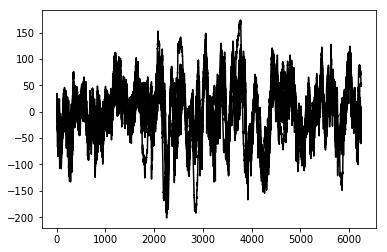

In [71]:
lines = plt.plot(data)
lines[-5].set_color('k')
plt.setp(lines, color='k')

In [65]:
%matplotlib inline

## Indexing

In [73]:
data[0, 1]

-2.6219999999999999

In [74]:
data[0, [0, 1]]

array([ 2.799, -2.622])

In [78]:
data[[0, 2], :2]

array([[  2.799,  -2.622],
       [ 10.835,   5.919]])

In [79]:
data[0, :]

array([  2.799,  -2.622,   3.282,   5.347,  14.977,  -4.088,  14.369,
        12.822,  17.566,   8.63 ])

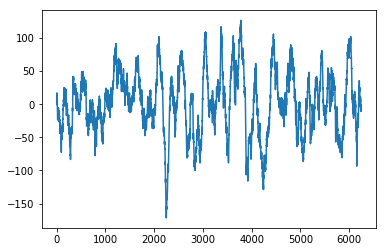

In [81]:
plt.plot(data[:, 2])

**Execise** Generate the `time` array to make the below command work (plot LFP with time units (seconds) on the x-axis)

In [87]:
time = np.arange(0, data.shape[0]) / sampling_frequency

Text(0,0.5,'LFP, $\\mu V$')

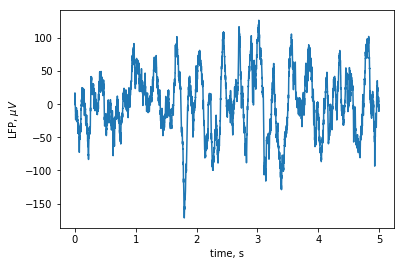

In [91]:
plt.plot(time, data[:, 2])
plt.xlabel('time, s')`
plt.ylabel('LFP, $\mu V$')

In [95]:
data[data < 0] = 0

Text(0,0.5,'LFP, $\\mu V$')

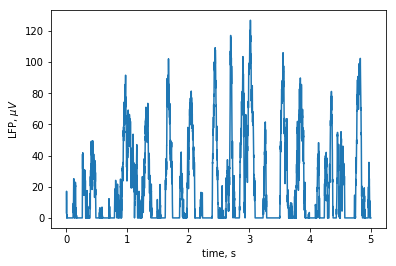

In [97]:
plt.plot(time, data[:, 2])
plt.xlabel('time, s')
plt.ylabel('LFP, $\mu V$')

In [104]:
a = np.arange(10)
np.concatenate((a[2:5], a[7:9]))

array([2, 3, 4, 7, 8])

In [105]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [107]:
np.r_[2:5, 7:9]

array([2, 3, 4, 7, 8])

In [98]:
np.mean(data)

19.399083632

In [114]:
single_channel = data[:, 0]

In [117]:
n_pts_win = int(0.1 * sampling_frequency)
n_pts_win

125

In [121]:
averaged = np.zeros(50)
for i in range(50):
    averaged[i] = np.mean(single_channel[i * n_pts_win:(i+1)*n_pts_win])

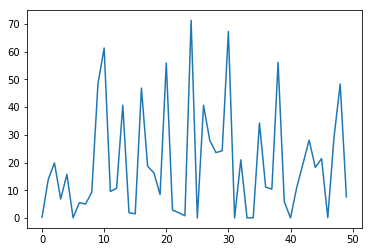

In [122]:
plt.plot(averaged)

## Spectrum

In [123]:
import scipy

In [124]:
from scipy import fftpack

In [127]:
lfp_fft = fftpack.rfft(single_channel)

(0, 60000)

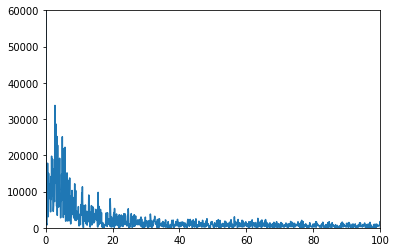

In [136]:
frequency = np.arange(len(lfp_fft)) / len(lfp_fft) * sampling_frequency / 2
plt.plot(frequency, np.abs(lfp_fft))
plt.xlim(0, 100)
plt.ylim(0, 60000)

In [132]:
sampling_frequency / 2

625.0

In [137]:
fftpack.rfft?